In [2]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt

# Check for total consumption

In [53]:
pd.set_option('display.max_rows', 10)
consumption_colnames = ["episode_number", "total_consumption"]
total_consumption = pd.read_csv('logs/extended_paper/run7-rewards-no-regulator.csv', names=consumption_colnames)
total_consumption

,episode_number,total_consumption
0,0.0,456352.665373
1,1.0,57066.650022
2,2.0,76927.117233
3,3.0,65031.445359
4,4.0,32242.208228
...,...,...
5989,5989.0,31398.283042
5990,5990.0,10827.238610
5991,5991.0,22029.759075
5992,5992.0,35473.837738


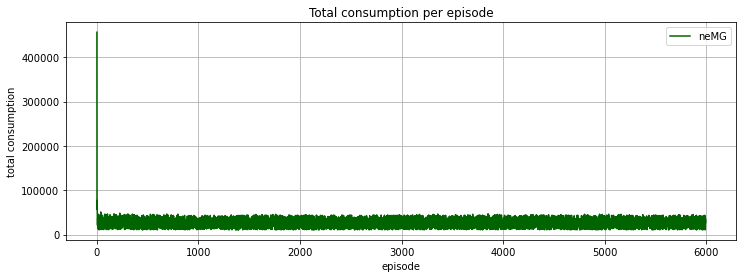

In [54]:
x1 = total_consumption['episode_number']
y1 = total_consumption['total_consumption']

fig, ax = plt.subplots(figsize=(12,4))

ax.set(xlabel='episode', ylabel='total consumption',
       title='Total consumption per episode')
ax.grid()

ax.plot(x1, y1, color='darkgreen', label='neMG')

plt.legend(loc='best')

plt.show()

I want to check what happened in the later episodes that had low total consumption. Who isn't learning?

In [286]:
later_episodes = total_consumption[(total_consumption['episode_number'] > 4000)]
later_episodes[later_episodes['total_consumption'] == later_episodes['total_consumption'].min()]

,episode_number,total_consumption
4536,4536.0,32438.650029


In [90]:
custom_slice = total_consumption[(total_consumption['episode_number'] > 5000) & (total_consumption['episode_number'] < 5050)]
custom_slice[custom_slice['total_consumption'] == custom_slice['total_consumption'].min()]

,episode_number,total_consumption
5039,5039.0,209630.267028


In [244]:
custom_query =  total_consumption[total_consumption['total_consumption'] == total_consumption['total_consumption'].max()]
custom_query

,episode_number,total_consumption
5490,5490.0,706566.027269


In [243]:
custom_query =  total_consumption[total_consumption['total_consumption'] == total_consumption['total_consumption'].min()]
custom_query

,episode_number,total_consumption
616,616.0,0.0
617,617.0,0.0
618,618.0,0.0
619,619.0,0.0
621,621.0,0.0
622,622.0,0.0


In [30]:
total_consumption[(total_consumption['episode_number'] > 5000) & (total_consumption['total_consumption'] < 100000)]

,episode_number,total_consumption
5226,5226.0,43460.640583


In [56]:
pd.set_option('display.max_rows', 10)
data_colnames = ["episode_number", "period_number", "step_number", "agent_name", 
                 "consumption", "resources", "limit_exploit", "penalty_multiplier", "penalty", "reward"]
data = pd.read_csv('logs/extended_paper/run54-consumption-regulator.csv', names=data_colnames)
data

,episode_number,period_number,step_number,agent_name,consumption,resources,limit_exploit,penalty_multiplier,penalty,reward
0,0,1,1,player0,0.000000,19821.157034,265.493108,0.944026,0.000000,-2.000000
1,0,1,2,player1,1134.430647,18686.726387,265.493108,0.944026,1689.237232,-3.479484
2,0,1,3,player2,699.438840,17987.287546,265.493108,0.944026,843.601818,-2.384435
3,0,1,4,player3,0.000000,17987.287546,265.493108,0.944026,0.000000,-2.000000
4,0,1,5,player4,0.000000,17987.287546,265.493108,0.944026,0.000000,-2.000000
...,...,...,...,...,...,...,...,...,...,...
4999995,5507,6,4999996,player0,787.118465,27413.620036,804.230759,1.059533,0.000000,0.098983
4999996,5507,6,4999997,player1,785.688937,26627.931100,804.230759,1.059533,0.000000,0.095170
4999997,5507,6,4999998,player2,789.717972,25838.213127,804.230759,1.059533,0.000000,0.105915
4999998,5507,6,4999999,player3,784.812480,25053.400647,804.230759,1.059533,0.000000,0.092833


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   episode_number      int64  
 1   period_number       int64  
 2   step_number         int64  
 3   agent_name          object 
 4   consumption         float64
 5   resources           float64
 6   limit_exploit       float64
 7   penalty_multiplier  float64
 8   penalty             float64
 9   reward              float64
dtypes: float64(6), int64(3), object(1)
memory usage: 381.5+ MB


In [58]:
pd.set_option('display.max_rows', None)
episode1 = data[data["episode_number"] == 5490]
episode1

,episode_number,period_number,step_number,agent_name,consumption,resources,limit_exploit,penalty_multiplier,penalty,reward
4982900,5490,1,4982901,player0,591.666341,29065.563467,603.173888,1.518071,0.0,-0.422223
4982901,5490,1,4982902,player1,580.288678,28485.274789,603.173888,1.518071,0.0,-0.452564
4982902,5490,1,4982903,player2,587.602749,27897.672039,603.173888,1.518071,0.0,-0.433059
4982903,5490,1,4982904,player3,590.816930,27306.855109,603.173888,1.518071,0.0,-0.424488
4982904,5490,1,4982905,player4,583.793342,26723.061767,603.173888,1.518071,0.0,-0.443218
4982905,5490,1,4982906,player0,579.401404,29937.656047,603.173888,1.518071,0.0,-0.454930
4982906,5490,1,4982907,player1,583.726957,29353.929090,603.173888,1.518071,0.0,-0.443395
4982907,5490,1,4982908,player2,577.305347,28776.623743,603.173888,1.518071,0.0,-0.460519
4982908,5490,1,4982909,player3,579.706907,28196.916836,603.173888,1.518071,0.0,-0.454115
4982909,5490,1,4982910,player4,577.510804,27619.406032,603.173888,1.518071,0.0,-0.459971


In [57]:
pd.set_option('display.max_rows', None)
episode2 = data[data["episode_number"] == 602]
episode2.size

10000

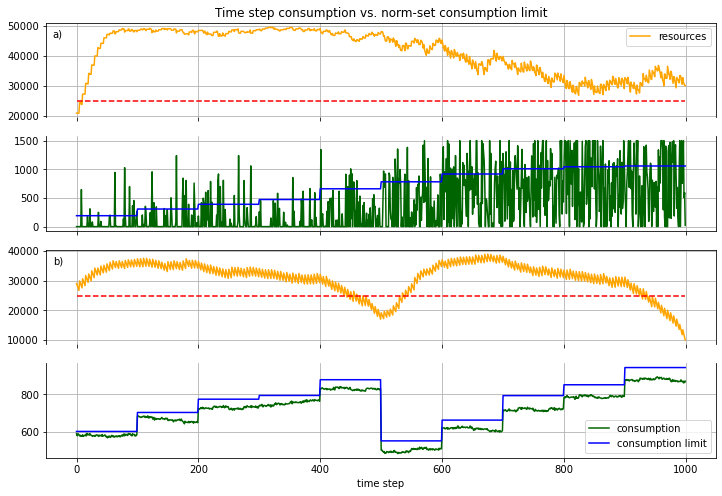

In [59]:
x = np.linspace(0, 999, 1000)
y1 = episode2['consumption']
y2 = episode2['limit_exploit']
y3 = episode2['resources']
y4 = np.array([25000] * 1000)
y5 = episode1['consumption']
y6 = episode1['limit_exploit']
y7 = episode1['resources']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8), sharex=True)

ax1.annotate("a)", xy=(0.01, 0.85), xycoords="axes fraction")

ax1.set(title='Time step consumption vs. norm-set consumption limit')
ax1.grid()
ax1.plot(x, y3, color='orange', label='resources')
ax1.plot(x, y4,'r--')

ax1.legend(loc='upper right')

ax2.grid()

ax2.set_facecolor('white')

ax2.plot(x, y1, color='darkgreen')
ax2.plot(x, y2, color='blue')

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#----#

ax3.annotate("b)", xy=(0.01, 0.85), xycoords="axes fraction")
ax3.grid()
ax3.plot(x, y7, color='orange')
ax3.plot(x, y4,'r--')

ax4.set(xlabel='time step')
ax4.grid()

ax4.set_facecolor('white')

ax4.plot(x, y5, color='darkgreen', label='consumption')
ax4.plot(x, y6, color='blue', label='consumption limit')

ax4.legend(loc='lower right')

ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

fig.savefig("episode_plot2.png")
plt.show()

In [33]:
pd.set_option('display.max_rows', 10)
data_colnames = ["episode_number", "period_number", "step_number", "agent_name", 
                 "consumption", "resources", "limit_exploit", "penalty_multiplier", "penalty", "reward"]
graph3 = pd.read_csv('logs/extended_paper/run1-consumption-no-regulator.csv', names=data_colnames)

In [38]:
pd.set_option('display.max_rows', None)
episode3 = graph3[graph3["episode_number"] == 800]
episode3

,episode_number,period_number,step_number,agent_name,consumption,resources,limit_exploit,penalty_multiplier,penalty,reward
80700,800,1,80701,player0,1500.000000,10362.563001,277.743336,1.429652,0,2.000000
80701,800,1,80702,player1,1500.000000,8862.563001,277.743336,1.429652,0,2.000000
80702,800,1,80703,player2,1500.000000,7362.563001,277.743336,1.429652,0,2.000000
80703,800,1,80704,player3,1500.000000,5862.563001,277.743336,1.429652,0,2.000000
80704,800,1,80705,player4,1500.000000,4362.563001,277.743336,1.429652,0,2.000000
80705,800,1,80706,player0,1500.000000,3955.336748,277.743336,1.429652,0,2.000000
80706,800,1,80707,player1,1500.000000,2455.336748,277.743336,1.429652,0,2.000000
80707,800,1,80708,player2,1500.000000,955.336748,277.743336,1.429652,0,2.000000
80708,800,1,80709,player3,955.336748,0.000000,277.743336,1.429652,0,0.547565
80709,800,1,80710,player4,0.000000,0.000000,277.743336,1.429652,0,-2.000000


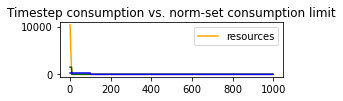

In [39]:
x = np.linspace(0, 999, 1000)
y1 = episode3['consumption']
y1 = np.append(y1, [0] * 900)
y2 = episode3['limit_exploit']
y2 = np.append(y2, [0] * 900)
y3 = episode3['resources']
y3 = np.append(y3, [0] * 900)
y4 = np.array([25000] * 1000)

fig, ax = plt.subplots(figsize=(4,1), sharex=True)

#ax1.annotate("a)", xy=(0.01, 0.85), xycoords="axes fraction")

ax.set(title='Timestep consumption vs. norm-set consumption limit')
ax.grid()
ax.plot(x, y3, color='orange', label='resources')

ax.legend(loc='upper right')

ax.grid()

ax.set_facecolor('white')

ax.plot(x, y1, color='darkgreen')
ax.plot(x, y2, color='blue')